In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/'My Drive'/'Hastings_Direct_task'

Mounted at /content/drive/
/content/drive/My Drive/Hastings_Direct_task


## Data importing

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
df_vehicles = pd.read_csv('vehicles.csv')
df_vehicles

,VEHICLE_ID,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS
0,vehicle104401,2355.228301,14.0,4985.366334,16.0
1,vehicle80628,17457.900654,2.0,7974.232760,11.0
2,vehicle211641R,9995.954859,15.0,9999.689025,53.0
3,vehicle46020,2104.581247,11.0,7012.133021,50.0
4,vehicle38531,3494.863930,10.0,8975.348352,20.0
...,...,...,...,...,...
90462,vehicle64265,1635.652886,12.0,5981.158836,59.0
90463,vehicle187921,599.244688,17.0,4986.564149,59.0
90464,vehicle214546,8993.225724,14.0,3002.508429,31.0
90465,vehicle2490,7011.831253,7.0,4998.673655,10.0


In [ ]:
df_claims = pd.read_csv('claims.csv')
df_claims

,POLICY_NUMBER,DATE_OF_ACCIDENT,CLAIM_ID,INCURRED
0,6.495393e+09,2019-09-13,claim150414,1019.306791
1,6.495821e+09,2020-10-07,claim33407,1.237647
2,6.495789e+09,2021-05-27 00:00:00,claim173327,13746.019943
3,6.495891e+09,2021-07-05,claim57413,2.599416
4,6.495447e+09,2019-05-25,claim258319,13858.684281
...,...,...,...,...
10483,6.495350e+09,2019-12-21,claim260687,125.047398
10484,6.495914e+09,2021-04-22,claim42091,99.302350
10485,6.495467e+09,2020-02-20,claim22384,85.308506
10486,6.495835e+09,2020-07-30,claim187487,1.256220


In [ ]:
df_customers = pd.read_csv('customers.csv')
df_customers

,CUSTOMER_ID,MARITALSTATUS,DATE_OF_BIRTH,NCD,EMPLOYMENTTYPE,VEHICLE_CLASSOFUSE
0,customer216583,Married,1980-11-11,3.0,Household Duties,Social only
1,customer103977R,Single,1964-10-22,9.0,Employed,Social inc. Comm
2,customer252093R,Widowed,1956-02-25,9.0,Retired,Social only
3,customer147628R,Single,1984-05-31,3.0,Employed,Social inc. Comm
4,customer38293,Single,1994-07-06,4.0,Employed,Social only
...,...,...,...,...,...,...
90464,customer18157,Married,1956-12-12,9.0,Employed,Social inc. Comm
90465,customer39863R,Single,1991-04-17,7.0,Employed,Business Use (PH)
90466,customer76592,Married,1978-05-16,3.0,Employed,Social only
90467,customer31548,Married,1943-10-22,9.0,Retired,Social only


In [ ]:
df_policies = pd.read_csv('policies.csv')
df_policies

,POLICY_NUMBER,START_DATE,END_DATE,POLICY_STATUS,PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID
0,6.495726e+09,2021-02-01 00:00:00,2022-01-31 00:00:00,Renewal,370.401518,2.0,NaN,vehicle70018R,customer17135R
1,6.495676e+09,2020-10-17,2021-10-16,New Business,142.969466,2.0,NaN,vehicle37044,customer115167
2,6.495813e+09,2020-06-11,2021-06-10,New Business,244.005751,1.0,NaN,vehicle197044,customer171987
3,6.495567e+09,2020-06-15 00:00:00,2021-06-14 00:00:00,Renewal,412.400710,2.0,NaN,vehicle39531R,customer79839R
4,6.495893e+09,2020-10-25,2021-10-24,New Business,185.538033,2.0,Monthly,vehicle109016,customer28508
...,...,...,...,...,...,...,...,...,...
90470,6.495345e+09,2018-10-20,2019-10-19,New Business,171.775478,2.0,NaN,vehicle96992,customer242805
90471,6.495719e+09,2019-12-27,2020-12-26,New Business,275.025662,1.0,NaN,vehicle68360,customer270050
90472,6.495538e+09,2020-05-29 00:00:00,2021-05-28 00:00:00,Renewal,132.270723,2.0,Monthly,vehicle229315R,customer21360R
90473,6.495427e+09,2019-02-22,2020-02-21,New Business,232.072537,1.0,NaN,vehicle186506,customer53930


In [ ]:
df_segments = pd.read_csv('segments.csv')
df_segments

,POLICY_NUMBER,START_DATE,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,SEGMENT_6_FLAG
0,6.495779e+09,2020-04-24,0.0,0.0,0.0,0.0,0.0,0.0
1,6.495991e+09,2021-04-06,0.0,0.0,0.0,0.0,0.0,0.0
2,6.495992e+09,2021-04-28,1.0,0.0,0.0,0.0,0.0,0.0
3,6.495720e+09,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0
4,6.495970e+09,2021-03-08,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
75004,6.495521e+09,2019-05-22,0.0,0.0,0.0,0.0,0.0,0.0
75005,6.495808e+09,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0
75006,6.495834e+09,2020-07-05,0.0,0.0,0.0,0.0,0.0,0.0
75007,6.495698e+09,2019-11-04,0.0,0.0,0.0,0.0,0.0,0.0


## Data pre-processing
Join the data frames using outer join

In [ ]:
# Join the data frames
df = df_policies.merge(df_customers, how='outer').merge(df_vehicles, how='outer').merge(df_claims, how='outer').merge(df_segments, how='outer')

In [ ]:
from datetime import datetime, date

# Convert to datetime format
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])

# Get today's date
today = date.today()

# Compute age and add it as a column
df['Age'] = df['DATE_OF_BIRTH'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

# Categorise into age groups
df['Age_group'] = pd.cut(df['Age'], bins=[16,25,35,45,55,65,90], labels=["17-25","26-35","36-45","46-55","56-65","65+"])
df

,POLICY_NUMBER,START_DATE,END_DATE,POLICY_STATUS,PREMIUM,NUMBER_OF_DRIVERS,PAYMENTMETHOD,VEHICLE_ID,CUSTOMER_ID,MARITALSTATUS,...,CLAIM_ID,INCURRED,SEGMENT_1_FLAG,SEGMENT_2_FLAG,SEGMENT_3_FLAG,SEGMENT_4_FLAG,SEGMENT_5_FLAG,SEGMENT_6_FLAG,Age,Age_group
0,6.495726e+09,2021-02-01 00:00:00,2022-01-31 00:00:00,Renewal,370.401518,2.0,NaN,vehicle70018R,customer17135R,Single,...,claim458112,79.462299,NaN,NaN,NaN,NaN,NaN,NaN,28.0,26-35
1,6.495726e+09,2020-02-01,2021-01-31,New Business,369.137312,2.0,NaN,vehicle70018,customer17135,Single,...,claim458112,79.462299,0.0,0.0,0.0,0.0,0.0,0.0,28.0,26-35
2,6.495676e+09,2020-10-17,2021-10-16,New Business,142.969466,2.0,NaN,vehicle37044,customer115167,Married,...,claim361411,89.241458,0.0,0.0,0.0,0.0,0.0,0.0,61.0,56-65
3,6.495813e+09,2020-06-11,2021-06-10,New Business,244.005751,1.0,NaN,vehicle197044,customer171987,Single,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,34.0,26-35
4,6.495567e+09,2020-06-15 00:00:00,2021-06-14 00:00:00,Renewal,412.400710,2.0,NaN,vehicle39531R,customer79839R,CommonLaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90537,6.495733e+09,2020-02-06,2021-02-05,New Business,126.539718,2.0,NaN,vehicle62048,customer273560,Married,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,41.0,36-45
90538,6.495345e+09,2018-10-20,2019-10-19,New Business,171.775478,2.0,NaN,vehicle96992,customer242805,CommonLaw,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,50.0,46-55
90539,6.495719e+09,2019-12-27,2020-12-26,New Business,275.025662,1.0,NaN,vehicle68360,customer270050,Single,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31.0,26-35
90540,6.495427e+09,2019-02-22,2020-02-21,New Business,232.072537,1.0,NaN,vehicle186506,customer53930,Married,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,50.0,46-55


## Exploratory Data Analysis

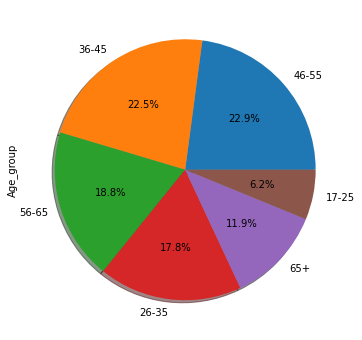

In [ ]:
# Display percentage of age groups
df['Age_group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(12, 6))

Married        42679
Single         25060
CommonLaw      12789
Divorced        6942
Widowed         2228
Parthership      775
None               1
Name: MARITALSTATUS, dtype: int64


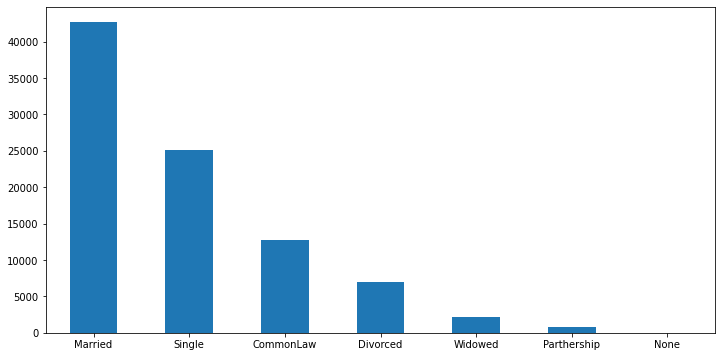

In [ ]:
# Display marital status distribution
print(df['MARITALSTATUS'].value_counts())
df['MARITALSTATUS'].value_counts().plot.bar(rot=0, figsize=(12, 6))

In [ ]:
# Display summary statistics
df.iloc[:,1:-8].describe()

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,90446.000000,90439.000000,9.051000e+04,9.043400e+04,9.047000e+04,9.052800e+04,9.045000e+04,13585.000000
mean,262.984099,1.600946,4.490944e+02,5.453424e+03,3.413855e+02,7.278506e+03,3.814423e+02,2132.334092
std,142.626035,0.606876,6.647742e+04,4.726958e+04,5.758417e+04,4.709407e+04,5.759033e+04,6949.723506
min,28.802259,1.000000,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.999000e+03,-211.627233
25%,163.052862,1.000000,5.000000e+00,1.947612e+03,7.000000e+00,4.985964e+03,2.400000e+01,10.026851
50%,219.863549,2.000000,9.000000e+00,3.885063e+03,1.000000e+01,6.973660e+03,4.100000e+01,96.937265
75%,317.081900,2.000000,9.000000e+00,6.985640e+03,1.300000e+01,9.973952e+03,6.700000e+01,2079.495907
max,2287.951049,7.000000,1.000000e+07,1.000001e+07,1.000000e+07,1.000000e+07,1.000000e+07,275280.578552


### Handling outliers

In [ ]:
# Keep only those values that are within +3 to -3 standard deviations and are non-negative
df = df[(np.abs(df.NCD-df.NCD.mean()) <= (3*df.NCD.std())) & (df.NCD >=0)]
df = df[(np.abs(df.VEHICLE_VALUE-df.VEHICLE_VALUE.mean()) <= (3*df.VEHICLE_VALUE.std())) & (df.VEHICLE_VALUE >=0)]
df = df[(np.abs(df.VEHICLE_AGE-df.VEHICLE_AGE.mean()) <= (3*df.VEHICLE_AGE.std())) & (df.VEHICLE_AGE >=0)]
df = df[(np.abs(df.VEHICLE_ANNUALMILEAGE-df.VEHICLE_ANNUALMILEAGE.mean()) <= (3*df.VEHICLE_ANNUALMILEAGE.std())) & (df.VEHICLE_ANNUALMILEAGE >=0)]
df = df[(np.abs(df.VEHICLE_OWNEDMONTHS-df.VEHICLE_OWNEDMONTHS.mean()) <= (3*df.VEHICLE_OWNEDMONTHS.std())) & (df.VEHICLE_OWNEDMONTHS >=0)]

In [ ]:
# Display summary statistics after removing outliers
df.iloc[:,1:-8].describe()

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,90104.000000,90098.000000,90200.000000,90200.000000,90200.000000,90200.000000,90200.000000,13539.000000
mean,262.944152,1.601046,7.155067,5233.136282,9.796275,7057.624008,50.043348,2130.809081
std,142.601210,0.606839,2.683235,5018.882563,4.368040,3426.182359,36.441472,6955.893205
min,28.802259,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-211.627233
25%,163.050237,1.000000,5.000000,1947.561151,7.000000,4985.951079,24.000000,10.015530
50%,219.813922,2.000000,9.000000,3885.749063,10.000000,6973.253877,41.000000,96.941428
75%,317.041031,2.000000,9.000000,6985.598131,13.000000,9973.989271,67.000000,2078.086851
max,2287.951049,7.000000,9.000000,75014.190770,34.000000,128014.035124,322.000000,275280.578552


In [20]:
df.to_csv('combined_df.csv', index=False)

In [ ]:
from google.colab import files
files.download('combined_df.csv')

## Loss Ratio
**Loss Ratio = Sum of Incurred / Sum of Premium**

### Loss Ratio per age group

In [ ]:
df_lr_age = df[['Age_group', 'INCURRED', 'PREMIUM']]
df_lr_age = df_lr_age.groupby(['Age_group']).sum()
df_lr_age['Loss Ratio %'] = ((df_lr_age['INCURRED']/df_lr_age['PREMIUM']) * 100).round(2)
df_lr_age.reset_index()

,Age_group,INCURRED,PREMIUM,Loss Ratio %
0,17-25,2.085900e+06,2.729137e+06,76.43
1,26-35,5.761164e+06,5.779965e+06,99.67
2,36-45,6.778268e+06,5.283707e+06,128.29
3,46-55,6.295869e+06,4.390563e+06,143.40
4,56-65,4.700162e+06,3.222513e+06,145.85
5,65+,3.218401e+06,2.279854e+06,141.17


Text(0, 0.5, 'Percentage')

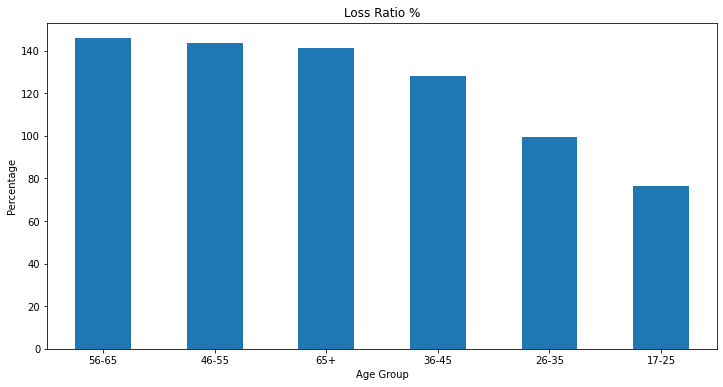

In [ ]:
df_lr_age['Loss Ratio %'].sort_values(ascending=False).plot.bar(rot=0, figsize=(12, 6))
plt.title("Loss Ratio %")
plt.xlabel("Age Group")
plt.ylabel("Percentage")

### Loss Ratio per marital status

In [ ]:
df_lr_ms = df[['MARITALSTATUS', 'INCURRED', 'PREMIUM']]
df_lr_ms = df_lr_ms.groupby(['MARITALSTATUS']).sum()
df_lr_ms['Loss Ratio %'] = ((df_lr_ms['INCURRED']/df_lr_ms['PREMIUM']) * 100).round(2)
df_lr_ms = df_lr_ms.drop(index=('None'))
df_lr_ms.reset_index()

,MARITALSTATUS,INCURRED,PREMIUM,Loss Ratio %
0,CommonLaw,3.594357e+06,3.252116e+06,110.52
1,Divorced,2.218979e+06,1.484095e+06,149.52
2,Married,1.322524e+07,9.788246e+06,135.11
3,Parthership,2.655061e+05,2.384059e+05,111.37
4,Single,8.993423e+06,8.416511e+06,106.85
5,Widowed,5.237301e+05,4.944688e+05,105.92


Text(0, 0.5, 'Percentage')

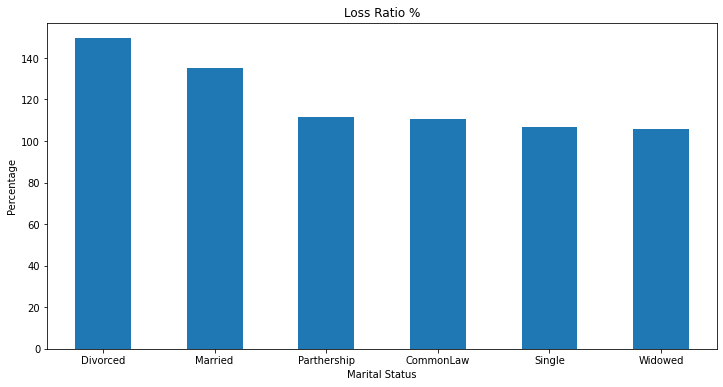

In [ ]:
df_lr_ms['Loss Ratio %'].sort_values(ascending=False).plot.bar(rot=0, figsize=(12, 6))
plt.title("Loss Ratio %")
plt.xlabel("Marital Status")
plt.ylabel("Percentage")

## Claim Frequency
**Claim Frequency	= Sum of claims / Sum of Policies**

### Claim Frequency per age group

In [ ]:
df_cf_age = df[['Age_group', 'CLAIM_ID', 'POLICY_NUMBER']]
df_cf_age = df_cf_age.groupby(['Age_group']).count()
df_cf_age['Claim Frequency %'] = ((df_cf_age['CLAIM_ID']/df_cf_age['POLICY_NUMBER']) * 100).round(2)
df_cf_age.reset_index()

,Age_group,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,17-25,828,5618,14.74
1,26-35,2649,16042,16.51
2,36-45,3342,20264,16.49
3,46-55,3084,20676,14.92
4,56-65,2292,16920,13.55
5,65+,1361,10651,12.78


Text(0, 0.5, 'Percentage')

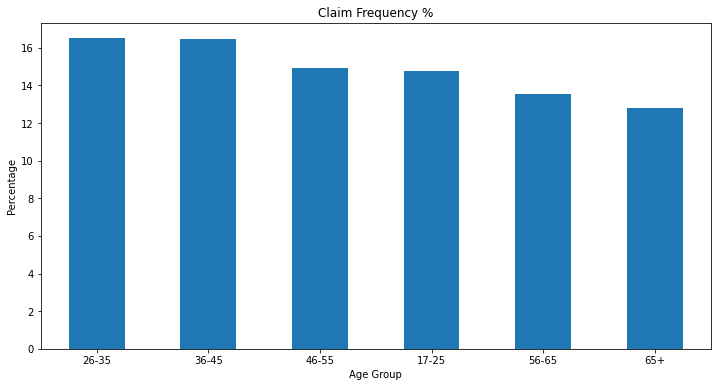

In [ ]:
df_cf_age['Claim Frequency %'].sort_values(ascending=False).plot.bar(rot=0, figsize=(12, 6))
plt.title("Claim Frequency %")
plt.xlabel("Age Group")
plt.ylabel("Percentage")

### Claim Frequency per marital status

In [ ]:
df_cf_ms = df[['MARITALSTATUS', 'CLAIM_ID', 'POLICY_NUMBER']]
df_cf_ms = df_cf_ms.groupby(['MARITALSTATUS']).count()
df_cf_ms['Claim Frequency %'] = ((df_cf_ms['CLAIM_ID']/df_cf_ms['POLICY_NUMBER']) * 100).round(2)
df_cf_ms = df_cf_ms.drop(index=('None'))
df_cf_ms.reset_index()

,MARITALSTATUS,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,CommonLaw,1897,12740,14.89
1,Divorced,1009,6915,14.59
2,Married,6632,42523,15.60
3,Parthership,97,769,12.61
4,Single,3662,24974,14.66
5,Widowed,258,2211,11.67


Text(0, 0.5, 'Percentage')

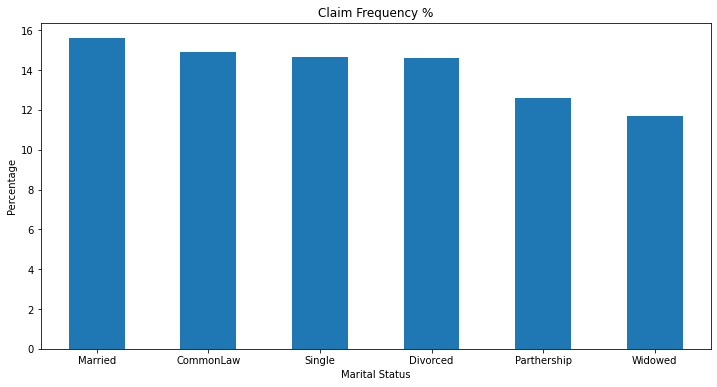

In [ ]:
df_cf_ms['Claim Frequency %'].sort_values(ascending=False).plot.bar(rot=0, figsize=(12, 6))
plt.title("Claim Frequency %")
plt.xlabel("Marital Status")
plt.ylabel("Percentage")

## Segment analysis

In [ ]:
df_flags = df.drop(columns=['START_DATE', 'END_DATE', 'PAYMENTMETHOD', 'VEHICLE_ID', 'CUSTOMER_ID', 'DATE_OF_BIRTH', 'DATE_OF_ACCIDENT', 'Age'])

### Segment 1

In [ ]:
df_age1 = df[['Age_group', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_1_FLAG']]
df_age1 = df_age1[df_age1['SEGMENT_1_FLAG']==1].drop(columns='SEGMENT_1_FLAG')
df_age1 = df_age1.groupby(['Age_group']).count()
df_age1['Claim Frequency %'] = ((df_age1['CLAIM_ID']/df_age1['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per age group for Segment 1: {:0.2f} % \n".format(df_age1['Claim Frequency %'].mean()))
df_age1.reset_index()

Avg. Claim Freq. per age group for Segment 1: 13.81 % 



,Age_group,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,17-25,21,146,14.38
1,26-35,175,1143,15.31
2,36-45,300,1969,15.24
3,46-55,303,2392,12.67
4,56-65,254,2187,11.61
5,65+,218,1597,13.65


In [ ]:
df_ms1 = df[['MARITALSTATUS', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_1_FLAG']]
df_ms1 = df_ms1[df_ms1['SEGMENT_1_FLAG']==1].drop(columns='SEGMENT_1_FLAG')
df_ms1 = df_ms1.groupby(['MARITALSTATUS']).count()
df_ms1['Claim Frequency %'] = ((df_ms1['CLAIM_ID']/df_ms1['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per marital status for Segment 1: {:0.2f} % \n".format(df_ms1['Claim Frequency %'].mean()))
df_ms1.reset_index()

Avg. Claim Freq. per marital status for Segment 1: 13.02 % 



,MARITALSTATUS,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,CommonLaw,157,1120,14.02
1,Divorced,110,801,13.73
2,Married,693,5108,13.57
3,Parthership,9,69,13.04
4,Single,261,1952,13.37
5,Widowed,39,375,10.40


In [ ]:
# Categorical columns
for c in df_flags.drop(columns=['CLAIM_ID']).select_dtypes(include='object').columns:
    print ("\n---- %s percentage ---" % c)
    print (((df_flags[c][df_flags['SEGMENT_1_FLAG']==1].value_counts()/df_flags[c].value_counts()) * 100).round(2))

print ("\n---- %s percentage ---" % "Age_group")
print (((df_flags['Age_group'][df_flags['SEGMENT_1_FLAG']==1].value_counts()/df_flags['Age_group'].value_counts()) * 100).round(2))


---- POLICY_STATUS percentage ---
Cancelled       10.43
New Business    12.70
Renewal           NaN
Name: POLICY_STATUS, dtype: float64

---- MARITALSTATUS percentage ---
CommonLaw       8.79
Divorced       11.58
Married        12.01
None             NaN
Parthership     8.97
Single          7.82
Widowed        16.96
Name: MARITALSTATUS, dtype: float64

---- EMPLOYMENTTYPE percentage ---
Employed                           9.98
Household Duties                  10.11
In Full Or Part Time Education     2.83
Independent Means                 13.04
Not employed due to disability     6.43
Retired                           15.49
Self Employed                      9.11
Unemployed                         8.90
Unknown                             NaN
Voluntary Work                     3.57
Name: EMPLOYMENTTYPE, dtype: float64

---- VEHICLE_CLASSOFUSE percentage ---
Business Use (PH)                             12.29
Business use (PH + Spouse / Civil Partner)    14.18
Business use (spouse / Civil

In [ ]:
# Status for numerical columns
df_flags[df_flags['SEGMENT_1_FLAG']==1].iloc[:,:-7].describe().drop(columns=['POLICY_NUMBER'])

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,9428.000000,9425.000000,9436.000000,9436.000000,9436.000000,9436.000000,9436.000000,1267.000000
mean,218.446896,1.629072,8.225837,6178.397484,7.791543,7053.816948,71.212378,2063.580458
std,91.490736,0.598104,1.712442,4551.503571,2.262970,3326.684500,22.373518,4669.710849
min,102.246233,1.000000,0.000000,297.928258,0.000000,160.654575,0.000000,0.000000
25%,152.549927,1.000000,9.000000,3395.242558,6.000000,4988.149833,58.000000,9.625352
50%,192.877656,2.000000,9.000000,4995.337776,8.000000,6977.238440,70.000000,96.261822
75%,254.004801,2.000000,9.000000,7490.839224,9.000000,9958.657548,84.000000,2221.656654
max,1047.855278,6.000000,9.000000,60008.979309,16.000000,70305.999705,149.000000,40923.052095


### Segment 2

In [ ]:
df_age2 = df[['Age_group', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_2_FLAG']]
df_age2 = df_age2[df_age2['SEGMENT_2_FLAG']==1].drop(columns='SEGMENT_2_FLAG')
df_age2 = df_age2.groupby(['Age_group']).count()
df_age2['Claim Frequency %'] = ((df_age2['CLAIM_ID']/df_age2['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per age group for Segment 2: {:0.2f} % \n".format(df_age2['Claim Frequency %'].mean()))
df_age2.reset_index()

Avg. Claim Freq. per age group for Segment 2: 12.92 % 



,Age_group,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,17-25,4,47,8.51
1,26-35,57,387,14.73
2,36-45,94,640,14.69
3,46-55,104,690,15.07
4,56-65,64,607,10.54
5,65+,54,386,13.99


In [ ]:
df_ms2 = df[['MARITALSTATUS', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_2_FLAG']]
df_ms2 = df_ms2[df_ms2['SEGMENT_2_FLAG']==1].drop(columns='SEGMENT_2_FLAG')
df_ms2 = df_ms2.groupby(['MARITALSTATUS']).count()
df_ms2['Claim Frequency %'] = ((df_ms2['CLAIM_ID']/df_ms2['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per marital status for Segment 2: {:0.2f} % \n".format(df_ms2['Claim Frequency %'].mean()))
df_ms2.reset_index()

Avg. Claim Freq. per marital status for Segment 2: 14.80 % 



,MARITALSTATUS,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,CommonLaw,35,245,14.29
1,Divorced,34,186,18.28
2,Married,202,1485,13.60
3,Parthership,2,17,11.76
4,Single,92,759,12.12
5,Widowed,12,64,18.75


In [ ]:
# Categorical columns
for c in df_flags.drop(columns=['CLAIM_ID']).select_dtypes(include='object').columns:
    print ("\n---- %s percentage ---" % c)
    print (((df_flags[c][df_flags['SEGMENT_2_FLAG']==1].value_counts()/df_flags[c].value_counts()) * 100).round(2))

print ("\n---- %s percentage ---" % "Age_group")
print (((df_flags['Age_group'][df_flags['SEGMENT_2_FLAG']==1].value_counts()/df_flags['Age_group'].value_counts()) * 100).round(2))


---- POLICY_STATUS percentage ---
Cancelled       3.79
New Business    3.68
Renewal          NaN
Name: POLICY_STATUS, dtype: float64

---- MARITALSTATUS percentage ---
CommonLaw      1.92
Divorced       2.69
Married        3.49
None            NaN
Parthership    2.21
Single         3.04
Widowed        2.89
Name: MARITALSTATUS, dtype: float64

---- EMPLOYMENTTYPE percentage ---
Employed                          2.97
Household Duties                  3.62
In Full Or Part Time Education    0.57
Independent Means                 2.90
Not employed due to disability    1.25
Retired                           3.29
Self Employed                     3.97
Unemployed                        2.18
Unknown                            NaN
Voluntary Work                     NaN
Name: EMPLOYMENTTYPE, dtype: float64

---- VEHICLE_CLASSOFUSE percentage ---
Business Use (PH)                             1.21
Business use (PH + Spouse / Civil Partner)    1.04
Business use (spouse / Civil Parnter)         1.60

In [ ]:
# Status for numerical columns
df_flags[df_flags['SEGMENT_2_FLAG']==1].iloc[:,:-7].describe().drop(columns=['POLICY_NUMBER'])

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,2753.000000,2747.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,376.000000
mean,286.748897,1.555879,7.788176,4030.173340,11.562931,4853.405822,85.947044,2216.183795
std,132.711411,0.626605,2.117236,4164.203331,4.346993,2680.952422,43.058826,4928.709085
min,113.522572,1.000000,0.000000,46.251744,0.000000,204.518939,0.000000,0.000000
25%,189.728602,1.000000,7.000000,1456.488278,8.000000,2998.703681,55.000000,4.790647
50%,258.039659,1.000000,9.000000,2903.588323,11.000000,4982.802730,77.000000,98.907250
75%,345.940865,2.000000,9.000000,5013.311175,14.000000,6004.476852,110.000000,2282.114465
max,1307.090863,4.000000,9.000000,55101.984246,30.000000,51985.021385,308.000000,52863.502420


### Segment 3

In [ ]:
df_age3 = df[['Age_group', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_3_FLAG']]
df_age3 = df_age3[df_age3['SEGMENT_3_FLAG']==1].drop(columns='SEGMENT_3_FLAG')
df_age3 = df_age3.groupby(['Age_group']).count()
df_age3['Claim Frequency %'] = ((df_age3['CLAIM_ID']/df_age3['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per age group for Segment 3: {:0.2f} % \n".format(df_age3['Claim Frequency %'].mean()))
df_age3.reset_index()

Avg. Claim Freq. per age group for Segment 3: 17.04 % 



,Age_group,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,17-25,5,15,33.33
1,26-35,41,246,16.67
2,36-45,45,323,13.93
3,46-55,30,311,9.65
4,56-65,41,300,13.67
5,65+,35,233,15.02


In [ ]:
df_ms3 = df[['MARITALSTATUS', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_3_FLAG']]
df_ms3 = df_ms3[df_ms3['SEGMENT_3_FLAG']==1].drop(columns='SEGMENT_3_FLAG')
df_ms3 = df_ms3.groupby(['MARITALSTATUS']).count()
df_ms3['Claim Frequency %'] = ((df_ms3['CLAIM_ID']/df_ms3['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per marital status for Segment 3: {:0.2f} % \n".format(df_ms3['Claim Frequency %'].mean()))
df_ms3.reset_index()

Avg. Claim Freq. per marital status for Segment 3: 14.65 % 



,MARITALSTATUS,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,CommonLaw,26,195,13.33
1,Divorced,11,85,12.94
2,Married,125,894,13.98
3,Parthership,3,13,23.08
4,Single,28,204,13.73
5,Widowed,4,37,10.81


In [ ]:
# Categorical columns
for c in df_flags.drop(columns=['CLAIM_ID']).select_dtypes(include='object').columns:
    print ("\n---- %s percentage ---" % c)
    print (((df_flags[c][df_flags['SEGMENT_3_FLAG']==1].value_counts()/df_flags[c].value_counts()) * 100).round(2))

print ("\n---- %s percentage ---" % "Age_group")
print (((df_flags['Age_group'][df_flags['SEGMENT_3_FLAG']==1].value_counts()/df_flags['Age_group'].value_counts()) * 100).round(2))


---- POLICY_STATUS percentage ---
Cancelled       2.11
New Business    1.90
Renewal          NaN
Name: POLICY_STATUS, dtype: float64

---- MARITALSTATUS percentage ---
CommonLaw      1.53
Divorced       1.23
Married        2.10
None            NaN
Parthership    1.69
Single         0.82
Widowed        1.67
Name: MARITALSTATUS, dtype: float64

---- EMPLOYMENTTYPE percentage ---
Employed                          1.55
Household Duties                  1.08
In Full Or Part Time Education    0.35
Independent Means                  NaN
Not employed due to disability    1.07
Retired                           2.49
Self Employed                     1.20
Unemployed                        0.17
Unknown                            NaN
Voluntary Work                     NaN
Name: EMPLOYMENTTYPE, dtype: float64

---- VEHICLE_CLASSOFUSE percentage ---
Business Use (PH)                             1.59
Business use (PH + Spouse / Civil Partner)    1.61
Business use (spouse / Civil Parnter)         2.13

In [ ]:
# Status for numerical columns
df_flags[df_flags['SEGMENT_3_FLAG']==1].iloc[:,:-7].describe().drop(columns=['POLICY_NUMBER'])

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,1426.000000,1425.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,197.000000
mean,271.607366,1.679298,7.707983,14713.328547,3.817227,7333.973986,25.756303,2223.364477
std,142.653006,0.558665,2.394696,7737.585421,2.400843,2738.761336,16.460975,4875.549524
min,107.491760,1.000000,0.000000,1596.045762,0.000000,491.701092,0.000000,0.000000
25%,177.053578,1.000000,7.000000,9301.663121,2.000000,5018.292536,14.000000,7.417300
50%,231.110634,2.000000,9.000000,12769.432313,4.000000,7975.112254,23.000000,110.575476
75%,321.019513,2.000000,9.000000,18188.422111,5.000000,9975.600898,35.000000,2390.218175
max,1730.556247,4.000000,9.000000,69992.145563,13.000000,44981.548622,117.000000,41526.414518


### Segment 4

In [ ]:
df_age4 = df[['Age_group', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_4_FLAG']]
df_age4 = df_age4[df_age4['SEGMENT_4_FLAG']==1].drop(columns='SEGMENT_4_FLAG')
df_age4 = df_age4.groupby(['Age_group']).count()
df_age4['Claim Frequency %'] = ((df_age4['CLAIM_ID']/df_age4['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per age group for Segment 4: {:0.2f} % \n".format(df_age4['Claim Frequency %'].mean()))
df_age4.reset_index()

Avg. Claim Freq. per age group for Segment 4: 8.89 % 



,Age_group,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,17-25,0,0,NaN
1,26-35,0,0,NaN
2,36-45,0,2,0.00
3,46-55,1,25,4.00
4,56-65,80,463,17.28
5,65+,126,882,14.29


In [ ]:
df_ms4 = df[['MARITALSTATUS', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_4_FLAG']]
df_ms4 = df_ms4[df_ms4['SEGMENT_4_FLAG']==1].drop(columns='SEGMENT_4_FLAG')
df_ms4 = df_ms4.groupby(['MARITALSTATUS']).count()
df_ms4['Claim Frequency %'] = ((df_ms4['CLAIM_ID']/df_ms4['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per marital status for Segment 4: {:0.2f} % \n".format(df_ms4['Claim Frequency %'].mean()))
df_ms4.reset_index()

Avg. Claim Freq. per marital status for Segment 4: 10.31 % 



,MARITALSTATUS,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,CommonLaw,11,83,13.25
1,Divorced,16,131,12.21
2,Married,162,958,16.91
3,Parthership,0,3,0.00
4,Single,6,112,5.36
5,Widowed,12,85,14.12


In [ ]:
# Categorical columns
for c in df_flags.drop(columns=['CLAIM_ID']).select_dtypes(include='object').columns:
    print ("\n---- %s percentage ---" % c)
    print (((df_flags[c][df_flags['SEGMENT_4_FLAG']==1].value_counts()/df_flags[c].value_counts()) * 100).round(2))

print ("\n---- %s percentage ---" % "Age_group")
print (((df_flags['Age_group'][df_flags['SEGMENT_4_FLAG']==1].value_counts()/df_flags['Age_group'].value_counts()) * 100).round(2))


---- POLICY_STATUS percentage ---
Cancelled       1.13
New Business    1.86
Renewal          NaN
Name: POLICY_STATUS, dtype: float64

---- MARITALSTATUS percentage ---
CommonLaw      0.65
Divorced       1.89
Married        2.25
None            NaN
Parthership    0.39
Single         0.45
Widowed        3.84
Name: MARITALSTATUS, dtype: float64

---- EMPLOYMENTTYPE percentage ---
Employed                           0.02
Household Duties                    NaN
In Full Or Part Time Education      NaN
Independent Means                   NaN
Not employed due to disability     0.18
Retired                           11.82
Self Employed                      0.11
Unemployed                         0.09
Unknown                             NaN
Voluntary Work                      NaN
Name: EMPLOYMENTTYPE, dtype: float64

---- VEHICLE_CLASSOFUSE percentage ---
Business Use (PH)                             0.04
Business use (PH + Spouse / Civil Partner)    0.19
Business use (spouse / Civil Parnter)   

In [ ]:
# Status for numerical columns
df_flags[df_flags['SEGMENT_4_FLAG']==1].iloc[:,:-7].describe().drop(columns=['POLICY_NUMBER'])

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,1370.000000,1369.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,205.000000
mean,195.585764,1.616508,8.485423,8452.166791,7.365160,8612.394735,44.946064,1623.869997
std,61.385265,0.606776,1.642504,6510.616292,4.365341,2126.928429,32.757180,3414.106792
min,113.268042,1.000000,0.000000,19.492191,0.000000,1984.450397,0.000000,0.000000
25%,152.961164,1.000000,9.000000,3623.653518,4.000000,7020.080808,21.000000,15.022563
50%,182.937661,2.000000,9.000000,7042.626197,7.000000,8015.921308,37.000000,96.203066
75%,218.630567,2.000000,9.000000,11440.149576,10.000000,9995.177429,62.000000,1874.238925
max,659.538233,4.000000,9.000000,57595.269254,27.000000,23027.007682,225.000000,25987.008698


### Segment 5

In [ ]:
df_age5 = df[['Age_group', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_5_FLAG']]
df_age5 = df_age5[df_age5['SEGMENT_5_FLAG']==1].drop(columns='SEGMENT_5_FLAG')
df_age5 = df_age5.groupby(['Age_group']).count()
df_age5['Claim Frequency %'] = ((df_age5['CLAIM_ID']/df_age5['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per age group for Segment 5: {:0.2f} % \n".format(df_age5['Claim Frequency %'].mean()))
df_age5.reset_index()

Avg. Claim Freq. per age group for Segment 5: 11.41 % 



,Age_group,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,17-25,99,911,10.87
1,26-35,164,1219,13.45
2,36-45,82,561,14.62
3,46-55,56,461,12.15
4,56-65,44,370,11.89
5,65+,19,345,5.51


In [ ]:
df_ms5 = df[['MARITALSTATUS', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_5_FLAG']]
df_ms5 = df_ms5[df_ms5['SEGMENT_5_FLAG']==1].drop(columns='SEGMENT_5_FLAG')
df_ms5 = df_ms5.groupby(['MARITALSTATUS']).count()
df_ms5['Claim Frequency %'] = ((df_ms5['CLAIM_ID']/df_ms5['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per marital status for Segment 5: {:0.2f} % \n".format(df_ms5['Claim Frequency %'].mean()))
df_ms5.reset_index()

Avg. Claim Freq. per marital status for Segment 5: 9.06 % 



,MARITALSTATUS,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,CommonLaw,11,105,10.48
1,Divorced,4,23,17.39
2,Married,1,19,5.26
3,Parthership,0,19,0.00
4,Single,418,3368,12.41
5,Widowed,29,330,8.79


In [ ]:
# Categorical columns
for c in df_flags.drop(columns=['CLAIM_ID']).select_dtypes(include='object').columns:
    print ("\n---- %s percentage ---" % c)
    print (((df_flags[c][df_flags['SEGMENT_5_FLAG']==1].value_counts()/df_flags[c].value_counts()) * 100).round(2))

print ("\n---- %s percentage ---" % "Age_group")
print (((df_flags['Age_group'][df_flags['SEGMENT_5_FLAG']==1].value_counts()/df_flags['Age_group'].value_counts()) * 100).round(2))


---- POLICY_STATUS percentage ---
Cancelled       5.55
New Business    5.16
Renewal          NaN
Name: POLICY_STATUS, dtype: float64

---- MARITALSTATUS percentage ---
CommonLaw       0.82
Divorced        0.33
Married         0.04
None             NaN
Parthership     2.47
Single         13.49
Widowed        14.93
Name: MARITALSTATUS, dtype: float64

---- EMPLOYMENTTYPE percentage ---
Employed                           4.43
Household Duties                   0.41
In Full Or Part Time Education    18.05
Independent Means                   NaN
Not employed due to disability     7.14
Retired                            3.50
Self Employed                      3.17
Unemployed                         4.01
Unknown                             NaN
Voluntary Work                     3.57
Name: EMPLOYMENTTYPE, dtype: float64

---- VEHICLE_CLASSOFUSE percentage ---
Business Use (PH)                              3.81
Business use (PH + Spouse / Civil Partner)      NaN
Business use (spouse / Civil Pa

In [ ]:
# Status for numerical columns
df_flags[df_flags['SEGMENT_5_FLAG']==1].iloc[:,:-7].describe().drop(columns=['POLICY_NUMBER'])

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,3864.000000,3867.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,464.000000
mean,329.783476,1.411947,5.908480,4703.714796,9.392968,6623.182993,41.560238,2178.764492
std,176.773368,0.669096,3.011125,4143.348277,4.401633,3208.557125,34.547550,4220.172359
min,99.713746,1.000000,0.000000,143.749573,0.000000,206.957438,0.000000,0.000000
25%,196.569490,1.000000,3.000000,1786.169846,6.000000,4966.376855,19.000000,10.507006
50%,296.224347,1.000000,6.000000,3553.753197,9.000000,6008.224685,32.000000,103.929896
75%,414.360748,2.000000,9.000000,6242.500545,12.000000,8378.595484,53.000000,2433.882323
max,2177.693062,4.000000,9.000000,42012.498793,34.000000,51004.084585,308.000000,27182.551008


### Segment 6

In [ ]:
df_age6 = df[['Age_group', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_6_FLAG']]
df_age6 = df_age6[df_age6['SEGMENT_6_FLAG']==1].drop(columns='SEGMENT_6_FLAG')
df_age6 = df_age6.groupby(['Age_group']).count()
df_age6['Claim Frequency %'] = ((df_age6['CLAIM_ID']/df_age6['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per age group for Segment 6: {:0.2f} % \n".format(df_age6['Claim Frequency %'].mean()))
df_age6.reset_index()

Avg. Claim Freq. per age group for Segment 6: 11.72 % 



,Age_group,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,17-25,212,1956,10.84
1,26-35,368,2764,13.31
2,36-45,129,1065,12.11
3,46-55,57,513,11.11
4,56-65,26,218,11.93
5,65+,11,100,11.00


In [ ]:
df_ms6 = df[['MARITALSTATUS', 'CLAIM_ID', 'POLICY_NUMBER', 'SEGMENT_6_FLAG']]
df_ms6 = df_ms6[df_ms6['SEGMENT_6_FLAG']==1].drop(columns='SEGMENT_6_FLAG')
df_ms6 = df_ms6.groupby(['MARITALSTATUS']).count()
df_ms6['Claim Frequency %'] = ((df_ms6['CLAIM_ID']/df_ms6['POLICY_NUMBER']) * 100).round(2)
print("Avg. Claim Freq. per marital status for Segment 6: {:0.2f} % \n".format(df_ms6['Claim Frequency %'].mean()))
df_ms6.reset_index()

Avg. Claim Freq. per marital status for Segment 6: 10.51 % 



,MARITALSTATUS,CLAIM_ID,POLICY_NUMBER,Claim Frequency %
0,CommonLaw,106,872,12.16
1,Divorced,20,167,11.98
2,Married,177,1322,13.39
3,Parthership,8,106,7.55
4,Single,490,4112,11.92
5,Widowed,2,33,6.06


In [ ]:
# Categorical columns
for c in df_flags.drop(columns=['CLAIM_ID']).select_dtypes(include='object').columns:
    print ("\n---- %s percentage ---" % c)
    print (((df_flags[c][df_flags['SEGMENT_6_FLAG']==1].value_counts()/df_flags[c].value_counts()) * 100).round(2))

print ("\n---- %s percentage ---" % "Age_group")
print (((df_flags['Age_group'][df_flags['SEGMENT_6_FLAG']==1].value_counts()/df_flags['Age_group'].value_counts()) * 100).round(2))


---- POLICY_STATUS percentage ---
Cancelled       12.27
New Business     8.73
Renewal           NaN
Name: POLICY_STATUS, dtype: float64

---- MARITALSTATUS percentage ---
CommonLaw       6.84
Divorced        2.42
Married         3.11
None             NaN
Parthership    13.78
Single         16.47
Widowed         1.49
Name: MARITALSTATUS, dtype: float64

---- EMPLOYMENTTYPE percentage ---
Employed                           8.04
Household Duties                   6.93
In Full Or Part Time Education    32.13
Independent Means                  2.90
Not employed due to disability     3.57
Retired                            0.83
Self Employed                      6.08
Unemployed                        13.26
Unknown                             NaN
Voluntary Work                     3.57
Name: EMPLOYMENTTYPE, dtype: float64

---- VEHICLE_CLASSOFUSE percentage ---
Business Use (PH)                              5.62
Business use (PH + Spouse / Civil Partner)     1.61
Business use (spouse / Civil

In [ ]:
# Status for numerical columns
df_flags[df_flags['SEGMENT_6_FLAG']==1].iloc[:,:-7].describe().drop(columns=['POLICY_NUMBER'])

,PREMIUM,NUMBER_OF_DRIVERS,NCD,VEHICLE_VALUE,VEHICLE_AGE,VEHICLE_ANNUALMILEAGE,VEHICLE_OWNEDMONTHS,INCURRED
count,6607.000000,6612.000000,6617.000000,6617.000000,6617.000000,6617.000000,6617.000000,803.000000
mean,453.241373,1.675287,4.276863,5089.316383,8.991839,7032.874759,28.239535,2470.169412
std,151.610977,0.736276,2.659961,3933.905194,4.188564,3506.841318,20.895879,4875.628942
min,124.544915,1.000000,0.000000,102.979850,0.000000,195.205683,0.000000,-103.257999
25%,354.943144,1.000000,2.000000,2000.172576,6.000000,4992.965402,15.000000,4.494106
50%,425.186170,2.000000,4.000000,4014.271770,9.000000,6977.957322,25.000000,98.226884
75%,516.440168,2.000000,6.000000,7017.398676,12.000000,9030.984042,37.000000,2891.603559
max,1846.677362,7.000000,9.000000,27491.305098,30.000000,128014.035124,226.000000,35230.709357
